# TITANIC SURVIVAL PREDICTION (Machine Learning)

1. Objective: Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data. 

Readily available dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset

The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

## Steps taken

1. Data collection, processing and cleaning
2. Exploratory data analysis
3. Machine learning model 



## 1. Data Collection, processing and cleaning

In [152]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# importing evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#from sklearn.metrics import roc_auc_score, plot_roc_curve
#from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [153]:
#loading data

TitanicData = pd.read_csv('Titanic_Data.csv')
TitanicData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [154]:
#checking size of dataset

TitanicData.shape

(891, 12)

In [155]:
#checking for empty/missing values

TitanicData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [156]:
#removing, 'Name' (not needed)'cabin' column due to number of missing values

TitanicData.drop(['Cabin', 'Name'], axis = 1, inplace = True)
TitanicData

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [157]:
TitanicData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [158]:
# Filling in missing age values with mean age within dataset

TitanicData['Age'].fillna(TitanicData['Age'].mean(), inplace = True)

In [159]:
TitanicData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [160]:
TitanicData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

## 2. Exploratory data analysis

In [161]:
# checking number of people who did and did not survive

TitanicData['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [162]:
# gender differences in survival

pd.crosstab(TitanicData.Survived, TitanicData.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [163]:
TitanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [164]:
# average age difference of survived

TitanicData.groupby('Survived')['Age'].mean()

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

In [165]:
# Pclass survival

pd.crosstab(TitanicData.Survived, TitanicData.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


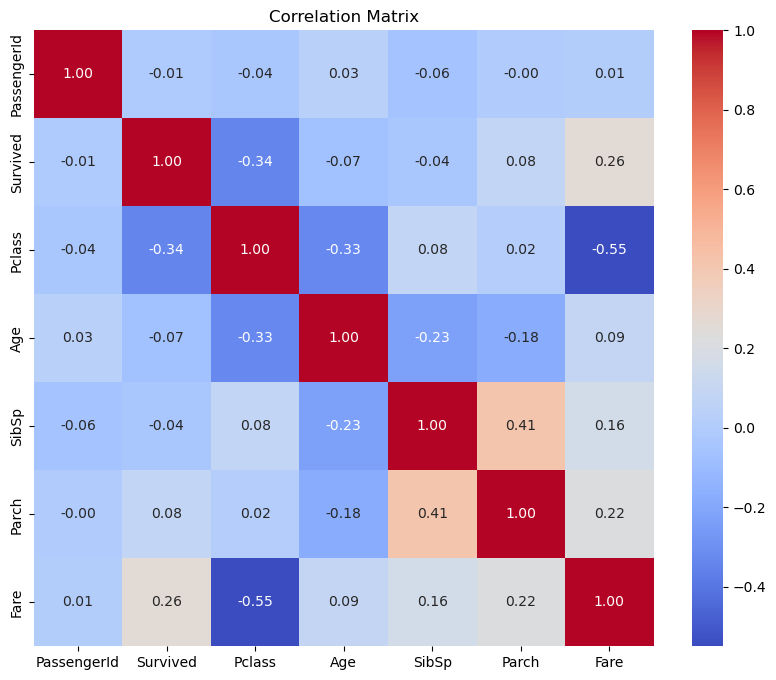

In [166]:
## visualising correlation matrix

numeric_columns = TitanicData.select_dtypes(include = ['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

## 3. Machine learning model

In [167]:
# splitting data into x and y for training and testing

X = TitanicData.drop('Survived', axis =1)
Y = TitanicData['Survived']

In [168]:
# encoding the data using onehot encoder from sklearn
categorical_features=['Sex', 'Ticket', 'Embarked']

one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

<891x693 sparse matrix of type '<class 'numpy.float64'>'
	with 6718 stored elements in Compressed Sparse Row format>

In [169]:
# splitting the dataset into train and test set
X_train, X_test, y_train, y_test=train_test_split(transformed_X, Y, test_size=0.2, random_state=42)

In [170]:
models={'Logistic Regression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'Random Forest Classifier':RandomForestClassifier(),
       'Support Vector Machine':SVC()}

In [171]:
# create a function to fit and score models
def fit_and_score(models, X_train,X_test, y_train, y_test):
    # set random seed
    np.random.seed(42)
    #make a dictionary to keep model scores
    model_scores={}
    #Loop through models
    for name,model in models.items():
        # Fit the model
        model.fit(X_train,y_train)
        #Evaluate the model and append its score
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [172]:
model_scores=fit_and_score(models=models, X_train=X_train,X_test=X_test,y_train=y_train ,y_test=y_test)
model_scores

/Users/jaycemoody/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.776536312849162,
 'KNN': 0.659217877094972,
 'Random Forest Classifier': 0.8212290502793296,
 'Support Vector Machine': 0.5977653631284916}

In [173]:
# Improving model by tuning KNN

train_scores={}
test_scores={}
n_neighbors=np.arange(2,30,1)
for neighbor in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_scores[neighbor]=knn.score(X_train, y_train)
    test_scores[neighbor]=knn.score(X_test,y_test)

In [174]:
train_scores

{2: 0.8075842696629213,
 3: 0.8047752808988764,
 4: 0.7485955056179775,
 5: 0.7542134831460674,
 6: 0.7247191011235955,
 7: 0.7219101123595506,
 8: 0.7008426966292135,
 9: 0.7050561797752809,
 10: 0.6980337078651685,
 11: 0.6882022471910112,
 12: 0.6867977528089888,
 13: 0.6924157303370787,
 14: 0.6924157303370787,
 15: 0.6910112359550562,
 16: 0.6853932584269663,
 17: 0.6839887640449438,
 18: 0.672752808988764,
 19: 0.6783707865168539,
 20: 0.672752808988764,
 21: 0.675561797752809,
 22: 0.672752808988764,
 23: 0.6797752808988764,
 24: 0.6825842696629213,
 25: 0.6825842696629213,
 26: 0.6783707865168539,
 27: 0.6769662921348315,
 28: 0.6825842696629213,
 29: 0.6811797752808989}

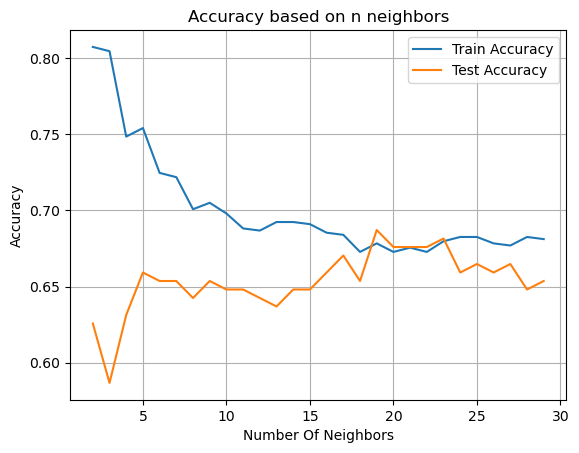

Maximum accuracy in test data is 68.715084%


In [175]:
plt.plot(n_neighbors, train_scores.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_scores.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy based on n neighbors")
plt.legend()
plt.grid()
plt.show()

print(f"Maximum accuracy in test data is {max(test_scores.values())*100:2f}%")

In [176]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [177]:
# printing the best parameter after tuning
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [178]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(C=1000, gamma=0.0001)


In [142]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [137]:
# Specifying the range of regularization parameters
alphas=np.logspace(-3,3,7)

# using cross_val_score to perform cross-validation
cv_scores=[]
for alpha in alphas:
    model=LogisticRegression(penalty='l2', C=1/alpha, solver='lbfgs', max_iter=1000)
    scores=cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))
    

# finding the best regualrization parameter
best_alpha=alphas[np.argmax(cv_scores)]

# train the model
final_model=LogisticRegression(penalty='l2', C=1/best_alpha, solver='lbfgs', max_iter=1000)
final_model.fit(X_train,y_train)


#predict on test sets
final_y_Pred=final_model.predict(X_test)

# Evaluating the model
final_accuracy=accuracy_score(y_test, final_y_Pred)
final_accuracy

/Users/jaycemoody/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jaycemoody/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

0.8268156424581006